# Analysis: Political Bias in the JISC corpus



## Load Data and Packages

In [17]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [18]:
import pandas as pd
import numpy as np
from pathlib import Path
from tools.helper_functions import *
from tools.mappings import *
from scipy.stats import entropy
from collections import defaultdict,Counter
import seaborn as sns
sns.set()

In [19]:
# set path for storing the images
figures_path = Path('figures')
figures_path.mkdir(exist_ok=True)

## Preprocess Data

In [20]:
path = Path('../data/Press_Directories_1846_1920_JISC_final.csv')
df = pd.read_csv(path,index_col=0)
print(df[~df['POLITICS'].isnull()].shape)
df = complete_records(df,'POLITICS')
print(df[~df['POLITICS'].isnull()].shape)

(36573, 19)
(38170, 20)


In [21]:
df['first_price'] = df['PRICE'].apply(lambda x: x.split('<SEP>')[0] if isinstance(x,str) else x)
df['first_price'] = df['first_price'].apply(lambda x: convert_price.get(x,None))
df = complete_records(df,'first_price')
df['first_price_red'] = df.first_price.apply(reduce_price,ceil=ceil)


In [ ]:
#df[(df.CATEGORY.isin(['provincial','irish','scottish','welsh','irish'])) & (df.YEAR <= 1900)]['POLITICS'].value_counts()

## Appendix Section C: Reclassification

In [22]:
temp = defaultdict(list)
for k,v in remap_politics.items():
    temp[v].append(k)
for k,v in  temp.items():
    v = ['"{}"'.format(','.join(i.split(";"))) for i in v]
    print(f'Mapped to {k.upper()}: ', '; '.join(v),)
    print()

Mapped to LIBERAL:  "liberal"; "liberal, moderate"; "whig"; "liberal, liberal"; "liberal, free-trade"; "ultra, liberal"; "liberal, independent"; "liberal, ultra"; "independent, liberal"; "liberal, non-comformist"; "advanced, liberal, non-comformist"; "moderate, liberal"; "utlra, liberal"; "republican"; "advanced, liberal"; "independent, li"; "independent, advanced, liberal"; "liberal, conservative, independent"; "liberal, tory, independent"; "tory, liberal"; "nationalist, liberal"; "national, liberal"

Mapped to CONSERVATIVE:  "conservative"; "tory"; "tory, old"; "high, tory"; "protestant, conservative"; "constitutional"; "anti-whig"; "independent, conservative"; "moderate, conservative"; "conservative, conservative"; "llberal, conservative"; "conservative, independent"; "unionist"; "liberal, unionist"; "independent, constitutional"; "conservative, unionist"; "conservative, constitutional"; "unionist, conservative"; "unionist, liberal"; "unionist, independent"

Mapped to NON-ALIGNED:  

In [23]:
df['POLITICS-2'] = df['POLITICS'].copy()
df.replace({'POLITICS-2':remap_politics},inplace=True)

In [24]:
df_prov = df[df['CATEGORY'].isin(['provincial','welsh','scottish','irish'])]
df_prov = df_prov[df_prov.YEAR <= 1900]
df_prov.shape

(27260, 24)

## Figure 5

In [ ]:
len(df['POLITICS'].value_counts()),len(df['POLITICS-2'].value_counts())

In [ ]:
df_prov['POLITICS-2'].unique()

In [ ]:
labels = set(i.strip() for l in df_prov['POLITICS'].unique() for i in str(l).split(';'))
len(labels)

In [ ]:
pd.Series(dict(Counter(l for l in df_prov['POLITICS-2']).most_common()[:20])).plot(kind='bar')

In [ ]:
pd.Series(dict(Counter(i.strip() for l in df_prov['POLITICS'] for i in str(l).split(';')).most_common()[:10])).plot(kind='bar')

In [ ]:
pd.Series(dict(Counter(i.strip() for l in df_prov['POLITICS-2'] for i in str(l).split(';')).most_common()[:10])).plot(kind='bar')

# Figure 6

In [ ]:
#import pickle
#path = Path('output_data/MPD_export_1846_1920_JISC_ref.csv')
#df = pd.read_csv(path,index_col=0)
#df = complete_records(df,'S-POL')
#df['S-POL-2'] = df['S-POL'].copy()
#df['S-POL-2'].fillna('nan',inplace=True)
#mapping = pickle.load(open('newspaper_metadata/pol_mapping.pickle','rb'))
#df.replace({'S-POL-2':mapping},inplace=True)
#df['IN_JISC'] = False
#df.loc[df['JISC'] > 0,'IN_JISC'] = True
#df_prov = df[df['CATEGORY'].isin(['provincial','welsh','scottish','irish'])]
#df_prov = df_prov[df_prov.year <= 1900]
#df_prov.reset_index(inplace=True)
#df_prov.shape

In [ ]:
#df_prov.shape

In [ ]:
#counts_by_year = df_prov.groupby(['YEAR'])['index'].count()
#counts_by_year_jisc = df_prov[df_prov.IN_JISC==True].groupby(['YEAR'])['index'].count()


In [ ]:
#df_prov

In [ ]:
plot_comparison_selected_categories([("liberal",'orange'),("conservative","blue")],df_prov,'POLITICS-2')

In [ ]:
plot_comparison_selected_categories([("non-aligned",'green'),("independent","y")],df_prov,'POLITICS-2')

## Divergence

In [ ]:

#def kl_divergence(df, labels, smoothing_factor):
#    df['num_pol_labels'] = df['S-POL'].apply(lambda x: len(str(x).split(';')))
#    pol_labels_all = df.groupby('year')['num_pol_labels'].sum()
#    pol_labels_jisc = df[df.IN_JISC==True].groupby('year')['num_pol_labels'].sum()
#
#    dfs_jisc, dfs_all = [], []
#    for l in labels: 
#        dfs_jisc.append(df[df.IN_JISC==True].groupby('year')[l].sum())
#        dfs_all.append(df.groupby('year')[l].sum())
#
#    
#    
#    dfs_jisc = pd.concat(dfs_jisc,axis=1)
#    dfs_all = pd.concat(dfs_all,axis=1)
#
#    df_probs_jisc = dfs_jisc.divide(pol_labels_jisc,axis=0)
#    df_probs_jisc = (df_probs_jisc + smoothing_factor
#                        ).divide(
#                            (df_probs_jisc+smoothing_factor).sum(axis=1), axis=0) 
#
#    df_probs_all = dfs_all.divide(pol_labels_all,axis=0)
#    df_probs_all = (df_probs_all + smoothing_factor
#                        ).divide(
#                            (df_probs_all+smoothing_factor).sum(axis=1), axis=0)
#
#    entropies = {}
#    for year in dfs_all.index:
#        entropies[year] = entropy(df_probs_all.loc[year],df_probs_jisc.loc[year])
#
#
#    return pd.DataFrame.from_dict(entropies,orient='index')

In [ ]:


#def kl_divergence(df,labels,smoothing=0.001):
#
#    props_pop, props_sample = [], []
#
#    for label in labels:
#        pol_prop = df.groupby(['S-POL-2','year'])['id'].count() / df.groupby(['year'])['id'].count()
#        
#        pol_prop_jisc = df[df['IN_JISC']==True].groupby(['S-POL-2','year'])['id'].count() / df[df['IN_JISC']==True].groupby(['year'])['id'].count()
#        
#        if isinstance(label,str):
#            pol_prop = pol_prop.loc[label,:].droplevel('S-POL-2')
#            try:
#                pol_prop_jisc = pol_prop_jisc.loc[label,:].droplevel('S-POL-2')
#            except:
#                pol_prop_jisc = pd.Series([.0]*len(df.year.unique()),index=df.year.unique())
#            
#         
#        elif isinstance(label,list):
#            pol_prop = pol_prop.loc[label,:].groupby('year').sum()
#            #print(pol_prop)
#            try:
#                pol_prop_jisc = pol_prop_jisc.loc[label,:].groupby('year').sum()
#            except:
#                pol_prop_jisc = pd.Series([.0]*len(df.year.unique()),index=df.year.unique())
#            
#        props_pop.append(pol_prop); props_sample.append(pol_prop_jisc) 
#    props_pop, props_sample = pd.concat(props_pop, axis=1).fillna(0),pd.concat(props_sample, axis=1).fillna(0)
#    props_pop+=smoothing
#    props_sample+=smoothing
#    entropies = {}
#    for year in props_pop.index:
#        entropies[year] = jensenshannon(props_pop.loc[year],props_sample.loc[year])
#    #return entropies
#    return props_pop,props_sample,pd.DataFrame.from_dict(entropies,orient='index')


#def divergence(df,labels,measure='jensenshannon',target='S-POL-2'):
#
#    props_pop, props_sample = [], []
#
#    for label in labels:
#        pol_prop = df.groupby([target,'year'])['id'].count() / df.groupby(['year'])['id'].count()
#        
#        pol_prop_jisc = df[df['IN_JISC']==True].groupby([target,'year'])['id'].count() / df[df['IN_JISC']==True].groupby(['year'])['id'].count()
#        
#        if isinstance(label,str):
#            pol_prop = pol_prop.loc[label,:].droplevel(target)
#            try:
#                pol_prop_jisc = pol_prop_jisc.loc[label,:].droplevel(target)
#            except:
#                pol_prop_jisc = pd.Series([.0]*len(df.year.unique()),index=df.year.unique())
#            
#         
#        elif isinstance(label,list):
#            pol_prop = pol_prop.loc[label,:].groupby('year').sum()
#            #print(pol_prop)
#            try:
#                pol_prop_jisc = pol_prop_jisc.loc[label,:].groupby('year').sum()
#            except:
#                pol_prop_jisc = pd.Series([.0]*len(df.year.unique()),index=df.year.unique())
#            
#        props_pop.append(pol_prop); props_sample.append(pol_prop_jisc) 
#    props_pop, props_sample = pd.concat(props_pop, axis=1).fillna(0),pd.concat(props_sample, axis=1).fillna(0)
#
#    scores = {}
#    for year in props_pop.index:
#        exec(f'scores[year] = {measure}(props_pop.loc[year],props_sample.loc[year])')
#    #return entropies
#    return props_pop,props_sample,pd.DataFrame.from_dict(scores,orient='index')
    
    
#entropies  = kl_divergence(df_prov,[['non-aligned','independent'],'liberal','conservative','nan'],smoothing=0.001)
#props_sample.columns = [['non-aligned','independent'],'liberal','conservative']
#pd.Series(entropies).plot()
#entropies  = kl_divergence(df_prov,[['non-aligned','independent'],'liberal','conservative','nan'],smoothing=.00001)
#props_sample.columns = [['non-aligned','independent'],'liberal','conservative']
#pd.Series(entropies).plot()


In [ ]:

#def plot_divergence(labels,smoothing_factors):
#    results = []
#    for sm in smoothing_factors:
#        results.append(prob_divergence(df_prov, labels, sm)[-1])
#    df_results = pd.concat(results,axis=1)
#    df_results.columns = smoothing_factors
#    df_results.plot() 
#plot_kl_divergence(df_prov, ['liberal','conservative','neutral_independent'], 0.001)

In [ ]:
target = 'POLITICS-2'
parties = [p for p in df_prov[target].unique() if isinstance(p,str)]
_,_,d= divergence(df_prov,parties,target=target) # df_prov[target].unique()
fig = d.plot(legend=False).get_figure()
fig.savefig(figures_path / 'jsd_pols.png')

In [ ]:
parties

In [ ]:
labels = ['conservative','liberal','non-aligned','independent']
prop_ppp,prop_sample, _ = divergence(df_prov, labels)

prop_ppp.columns = labels
prop_sample.columns = labels

kl_ps = []
for year in prop_ppp.index:
    
    kl_ps.append(list(map(kl_p,zip(prop_ppp.loc[year],prop_sample.loc[year]))))

kl_ps_df = pd.DataFrame(kl_ps, columns=labels)
fig = kl_ps_df.plot(legend=False).get_figure()
fig.savefig(figures_path / 'partial_kl.png')

## Price and place as other dimensions of bias 

In [25]:
df_prov.loc[df_prov['first_price_red'] > 6.0,'first_price_red'] = 6
selected_prices = list(df_prov.first_price_red.value_counts().index)
selected_prices.sort()
selected_prices

[0.0, 0.5, 1.0, 2.0, 3.0, 4.0, 5.0, 6.0]

## Figure 9

In [31]:
props_pop.columns = selected_prices
props_sample.columns = selected_prices

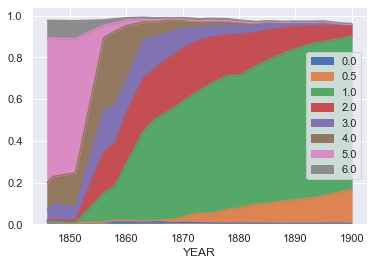

In [32]:
fig = props_pop.plot(kind='area').get_figure()
fig.savefig('images/price_area_pop.png')

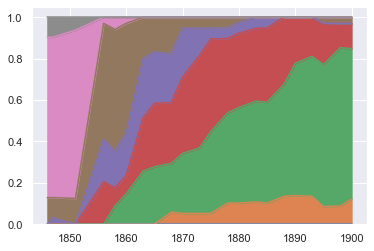

In [33]:
fig = props_sample.plot(kind='area',legend=False).get_figure()
fig.savefig('images/price_area_sample.png')

## Figure 10

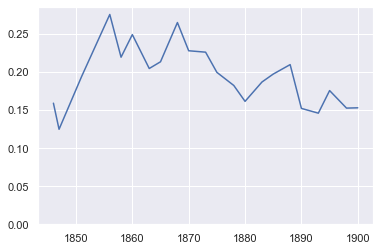

In [30]:
target = 'first_price_red'
props_pop,props_sample,d = divergence(df_prov,selected_prices,target=target)
fig = d.plot(legend=False,ylim=(.0,max(d.values)[0]+.01)).get_figure()
fig.savefig(figures_path / 'jsd_price.png')


In [38]:
labels = selected_prices

props_pop.columns = labels
props_sample.columns = labels

kl_ps = []
for year in props_pop.index:
    
    kl_ps.append(list(map(kl_p,zip(props_pop.loc[year],props_sample.loc[year]))))

kl_ps_df = pd.DataFrame(kl_ps, columns=labels)
kl_ps_df.index = df_prov.YEAR.unique()


In [39]:
kl_ps_df.std(axis=0).sort_values()

0.0    0.003031
6.0    0.005432
0.5    0.013040
5.0    0.022233
3.0    0.026328
4.0    0.037046
2.0    0.047575
1.0    0.055974
dtype: float64

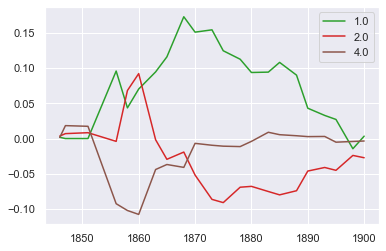

In [40]:
fig = kl_ps_df[[1.0,2.0,4.0]].plot(legend=True, color=['#2ca02c','#d62728','#8c564b']).get_figure()

In [43]:
#fig = kl_ps_df.plot(legend=False, lw=2,
#                    style=['.-','.-','.--','.--','.-','.--','.-','.-'],
#                    color=['grey','grey','#2ca02c','#d62728','grey','#8c564b','grey','grey']
#).get_figure()
#fig.savefig(figures_path / 'partial_price_kl.png')

## Appendix E

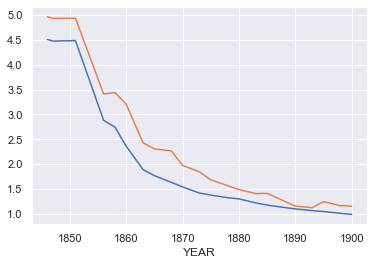

In [45]:
df_prov[(~df_prov['first_price'].isnull()) & (df_prov['first_price'] <= 12.0)].groupby('YEAR')['first_price'].mean().plot()
fig = df_prov[df_prov.IN_JISC > 0].groupby('YEAR')['first_price_red'].mean().plot().get_figure()
fig.savefig(figures_path/'price_avg_comp.png')

## Figure 11

In [47]:
df_prov_gb = df_prov[df_prov.CATEGORY.isin(['provincial','welsh','scottish'])]
counties = df_prov_gb.COUNTY_PUB.value_counts()
selected_counties = list(counties[counties > 1].index)
len(counties),len(selected_counties)

(88, 88)